In [1]:
!rm My_first_dataset_neo9.nwb

In [2]:
import neo
from neo import *
import pynwb
from pynwb import *
import quantities as pq
from quantities import s, ms, kHz, Hz, uV
import numpy as np
print("neo = ", neo.__version__)
print("pynwb = ", pynwb.__version__)

neo =  0.9.0.dev
pynwb =  1.1.2


# Create a nwb file from Neo

## Create 3 Neo blocks and populate each block with 4 Neo segments, and each segment with 3 Neo analogsignals objects

In [3]:
blocks = []

# Define Neo blocks
bl0 = neo.Block(name='First block')
bl1 = neo.Block(name='Second block')
bl2 = neo.Block(name='Third block')
print("bl0.segments = ", bl0.segments)      
print("bl1.segments = ", bl1.segments)
print("bl2.segments = ", bl2.segments)
blocks = [bl0, bl1, bl2]
print("blocks = ", blocks)

num_seg = 4 # number of segments

for blk in blocks: 
    for ind in range(num_seg): # number of Segment
        seg = Segment(name='segment %s %d' % (blk.name, ind), index=ind)
        blk.segments.append(seg)

    for seg in blk.segments: # AnalogSignal objects
        # 3 AnalogSignals
        a = AnalogSignal(np.random.randn(num_seg, 44)*pq.nA, sampling_rate=10*kHz)
        b = AnalogSignal(np.random.randn(num_seg, 64)*pq.nA, sampling_rate=10*kHz)
        c = AnalogSignal(np.random.randn(num_seg, 33)*pq.nA, sampling_rate=10*kHz)

        seg.analogsignals.append(a)
        seg.analogsignals.append(b)
        seg.analogsignals.append(c)

blocks

bl0.segments =  []
bl1.segments =  []
bl2.segments =  []
blocks =  [<neo.core.block.Block object at 0x7ff0d09d4dd8>, <neo.core.block.Block object at 0x7ff0d09d4e48>, <neo.core.block.Block object at 0x7ff0d09d4eb8>]


[Block with 4 segments
 name: 'First block'
 # segments (N=4)
 0: Segment with 3 analogsignals
    name: 'segment First block 0'
    # analogsignals (N=3)
    0: AnalogSignal with 44 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0
       time: 0.0 to 0.0004
    1: AnalogSignal with 64 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0
       time: 0.0 to 0.0004
    2: AnalogSignal with 33 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0
       time: 0.0 to 0.0004
 1: Segment with 3 analogsignals
    name: 'segment First block 1'
    # analogsignals (N=3)
    0: AnalogSignal with 44 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0
       time: 0.0 to 0.0004
    1: AnalogSignal with 64 channels of length 4; units nA; datatype float64 
       sampling rate: 10.0
       time: 0.0 to 0.0004
    2: AnalogSignal with 33 channels of length 4; units nA; datatype float64 
       samplin

# Write a nwb file

## Using Neo NWBIO

In [4]:
filename='My_first_dataset_neo9.nwb'

In [5]:
writer = NWBIO(filename, mode='w')
writer.write(blocks)

block in all_blocks =  <neo.core.block.Block object at 0x7ff0d09d4dd8>
segment.name =  segment First block 0
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment First block 1
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment First block 2
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment First block 3
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2


/home/elodie/miniconda2/envs/env_NWB_py3_pynwb_1_1_2/lib/python3.6/site-packages/pynwb/file.py:691: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")
/home/elodie/miniconda2/envs/env_NWB_py3_pynwb_1_1_2/lib/python3.6/site-packages/hdmf/build/map.py:949: MissingRequiredWarning: attribute 'unit' for 'data' (TimeSeries)
  warnings.warn(msg, MissingRequiredWarning)


block in all_blocks =  <neo.core.block.Block object at 0x7ff0d09d4e48>
segment.name =  segment Second block 0
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Second block 1
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Second block 2
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Second block 3
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
block in all_blocks =  <neo.core.block.Block object at 0x7ff0d09d4eb8>
segment.name =  segment Third block 0
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Third block 1
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Third block 2
signal_name =  signal0
signal_name =  signal1
signal_name =  signal2
segment.name =  segment Third block 3
signal_name =  signal0
signal_name =  signal1
signal_name =  signal

In [6]:
writer

# Read the NWB file

## Using pynwb

In [7]:
io = pynwb.NWBHDF5IO(filename, mode='r') # Open a file with NWBHDF5IO
_file = io.read()

In [8]:
print(_file)
_file.acquisition

root pynwb.file.NWBFile at 0x140672268833120
Fields:
  acquisition: {
    segment First block 0 <class 'pynwb.base.TimeSeries'>,
    segment First block 1 <class 'pynwb.base.TimeSeries'>,
    segment First block 2 <class 'pynwb.base.TimeSeries'>,
    segment First block 3 <class 'pynwb.base.TimeSeries'>,
    segment Second block 0 <class 'pynwb.base.TimeSeries'>,
    segment Second block 1 <class 'pynwb.base.TimeSeries'>,
    segment Second block 2 <class 'pynwb.base.TimeSeries'>,
    segment Second block 3 <class 'pynwb.base.TimeSeries'>,
    segment Third block 0 <class 'pynwb.base.TimeSeries'>,
    segment Third block 1 <class 'pynwb.base.TimeSeries'>,
    segment Third block 2 <class 'pynwb.base.TimeSeries'>,
    segment Third block 3 <class 'pynwb.base.TimeSeries'>
  }
  file_create_date: [datetime.datetime(2019, 12, 18, 15, 33, 32, 659080, tzinfo=tzoffset(None, 3600))]
  session_description: My_first_dataset_neo9.nwb
  session_start_time: 2019-12-18 15:33:32.656885+01:00
  timest

{'segment First block 0': segment First block 0 pynwb.base.TimeSeries at 0x140672263215424
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4, 33), type "<f8">
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (1,), type "<f8">
   timestamps_unit: seconds,
 'segment First block 1': segment First block 1 pynwb.base.TimeSeries at 0x140672267426616
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4, 33), type "<f8">
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (1,), type "<f8">
   timestamps_unit: seconds,
 'segment First block 2': segment First block 2 pynwb.base.TimeSeries at 0x140672260084512
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4, 33), type "<f8">
   interval: 1
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (1,), type "<f8">
   timestamps_unit: seconds,
 

## Using Neo NWBIO

In [9]:
reader = NWBIO(filename, mode='r')

In [10]:
reader

In [11]:
all_blocks = reader.read()

node =  segment First block 0
node =  segment First block 1
node =  segment First block 2
node =  segment First block 3
node =  segment Second block 0
node =  segment Second block 1
node =  segment Second block 2
node =  segment Second block 3
node =  segment Third block 0
node =  segment Third block 1
node =  segment Third block 2
node =  segment Third block 3


In [12]:
all_blocks

[Block with 1 segments
 description: 'My_first_dataset_neo9.nwb'
 annotations: {'file_access_dates': [datetime.datetime(2019, 12, 18, 15, 33, 32, 659080, tzinfo=tzoffset(None, 3600))],
   'file_read_log': ''}
 file_origin: 'My_first_dataset_neo9.nwb'
 file_datetime: [datetime.datetime(2019, 12, 18, 15, 33, 32, 659080, tzinfo=tzoffset(None, 3600))]
 rec_datetime: datetime.datetime(2019, 12, 18, 15, 33, 32, 656885, tzinfo=tzoffset(None, 3600))
 # segments (N=1)
 0: Segment with  name: 'NeoNWB IO' # analogsignals (N=0),
 Block with 1 segments
 description: 'My_first_dataset_neo9.nwb'
 annotations: {'file_access_dates': [datetime.datetime(2019, 12, 18, 15, 33, 32, 659080, tzinfo=tzoffset(None, 3600))],
   'file_read_log': ''}
 file_origin: 'My_first_dataset_neo9.nwb'
 file_datetime: [datetime.datetime(2019, 12, 18, 15, 33, 32, 659080, tzinfo=tzoffset(None, 3600))]
 rec_datetime: datetime.datetime(2019, 12, 18, 15, 33, 32, 656885, tzinfo=tzoffset(None, 3600))
 # segments (N=1)
 0: Segment w

In [13]:
first_block = reader.read_block() # Read the first block

node =  segment First block 0
node =  segment First block 1
node =  segment First block 2
node =  segment First block 3
node =  segment Second block 0
node =  segment Second block 1
node =  segment Second block 2
node =  segment Second block 3
node =  segment Third block 0
node =  segment Third block 1
node =  segment Third block 2
node =  segment Third block 3


In [14]:
first_block

Block with 1 segments
description: 'My_first_dataset_neo9.nwb'
annotations: {'file_access_dates': [datetime.datetime(2019, 12, 18, 15, 33, 32, 659080, tzinfo=tzoffset(None, 3600))],
  'file_read_log': ''}
file_origin: 'My_first_dataset_neo9.nwb'
file_datetime: [datetime.datetime(2019, 12, 18, 15, 33, 32, 659080, tzinfo=tzoffset(None, 3600))]
rec_datetime: datetime.datetime(2019, 12, 18, 15, 33, 32, 656885, tzinfo=tzoffset(None, 3600))
# segments (N=1)
0: Segment with  name: 'NeoNWB IO' # analogsignals (N=0)

output_filenames =  My_first_dataset_neo9.nwb
filenames =  My_first_dataset_neo9.nwb


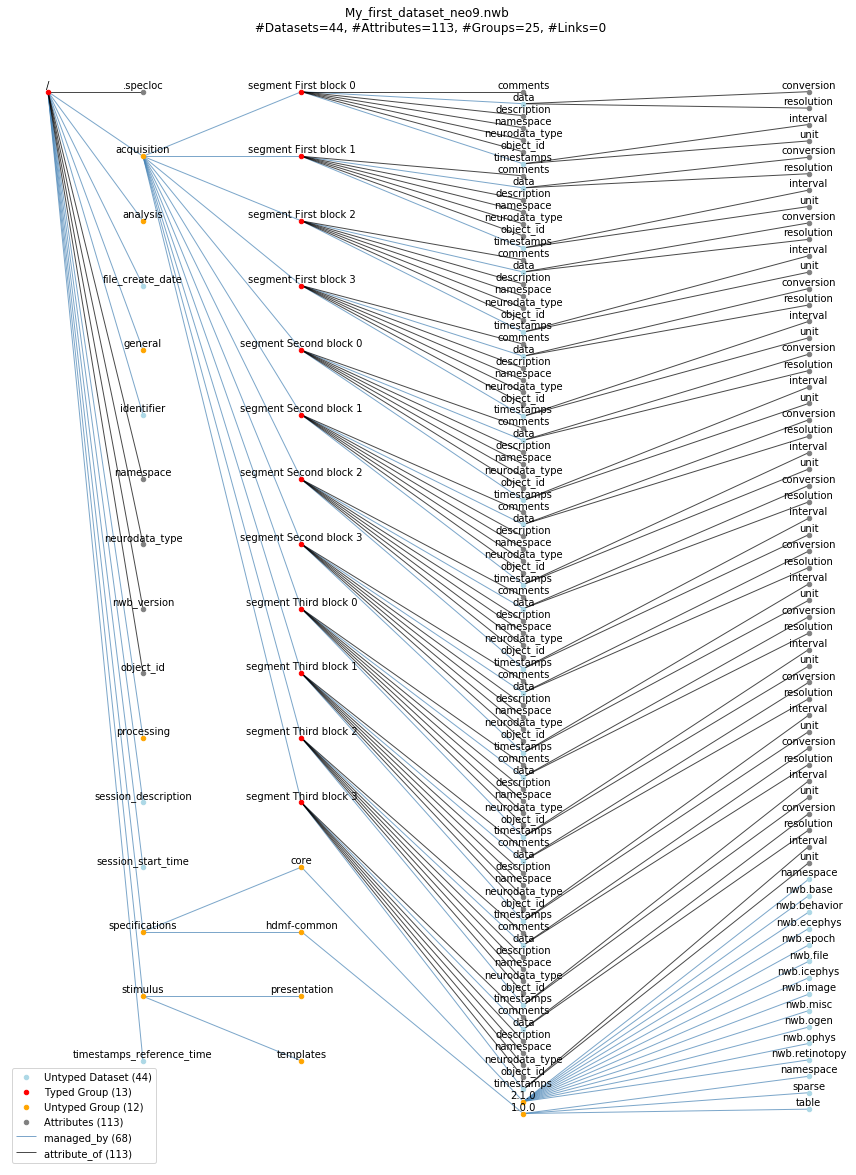

In [15]:
# Plotting settings
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files or a single example file
output_filenames = filename
print("output_filenames = ", output_filenames)
    
# Select the files to plot
filenames = output_filenames
print("filenames = ", filenames)

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt
        
# Create the plots for all files
file_hierarchy = HierarchyDescription.from_hdf5(filenames)
file_graph = NXGraphHierarchyDescription(file_hierarchy)          
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
plot_title = filenames + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()
        
# Show a sorted bar plot with the sizes of all datasets in the file
if show_bar_plot:
    d = {i['name']: np.prod(i['size']) for i in file_hierarchy['datasets']}
    l = [w for w in sorted(d, key=d.get, reverse=True)]
    s = [d[w] for w in l]   
    p = np.arange(len(l))   
    fig,ax = plt.subplots(figsize=(16,7))
    ax.set_title(filename)
    ax.bar(p, s, width=1, color='r')
    ax.set_xticks(p+1)  
    ax.set_xticklabels(l)  
    ax.set_yscale("log", nonposy='clip')
    fig.autofmt_xdate(bottom=0.2, rotation=90, ha='right')
    plt.show()
plt.show()